# Capitolo 4 - Il mondo aleatorio

## 4.1 - Calcolo delle probabilità e spazio campionario

### Il problema di De Méré

Primo caso: calcolo della probabilita' di ottenere almeno un 6 su 4 lanci consecutivi di un singolo dado.

In [8]:
gioco1a <- function(prove=10000){
  # spazio campionamento del lancio del dado, siccome siamo interessati
  # solo all'ultimo risultato (uscita del 6), possiamo campionare 
  # direttamente questo spazio con evento 1 nell'unico caso interessante
  dado <- c(0,0,0,0,0,1)
  # generiamo 4*prove campioni e li ordiniamo in una matrice con 4 righe
  # e n=prove colonne. Ogni colonna rappresenta quindi un gioco di 4 lanci
  # consecutivi del dado. I risultati che presentano almeno un 6 sono 
  # rappresentate dalle colonne che contengono almeno un 1
  mx   <- matrix(sample(dado, 4*prove, replace=TRUE),4,prove)
  # applichiamo alla matrice precedente la somma per colonne. 
  # Ricordiamo che la funzione apply permette di calcolare una generica 
  # funzione sulle righe (qualora lâapplicazione della funzione sulle righe 
  # abbia senso) o sulle colonne di una matrice di dati. La sintassi e'
  #
  # apply(X, dim, FUN), 
  #
  # dove X e' una matrice di dati, dim e' la dimensione lungo la quale si
  # vuole calcolare la funzione: 1 = per riga, 2 = per colonna), e FUN 
  # e' la funzione da applicare ai dati1
  somme<-apply(mx,2,sum)
  # calcoliamo infine la percentuale come rapporto fra il numero di casi
  # in cui esce almeno un 6 e il numero totale di prove. Si noti l'uso
  # della funzione 'which' per determinare il numero di elementi del
  # vettore 'somme' diversi da zero.
  (prove - length(which(somme==0)))/prove
  # versione alternativa con l'uso della funzione 'sum'
  #(prove - sum(somme==0))/prove
}


Secondo caso : calcolo della probabilita' di ottenere un doppio 6 su 24 lanci con due dadi

In [9]:
gioco2a <- function(prove=10000){
  # la probabilita' di ottenere un doppio 6 con due dadi e' pari a 1/36
  # per cui il nostro spazio da cambionare sara' (ricordiamo che la 
  # funzione 'rep' crea un array replicando il valore del primo elemento
  # n volte dove n e' il secondo elemento)
  dadi    <- rep(0,36); dadi[1] <- 1
  # da questo punto in poi la procedura e' analoga a gioco1a
  mx   <- matrix(sample(dadi, 24*prove, replace=TRUE),24,prove)
  somme<-apply(mx,2,sum)
  (prove - length(which(somme==0)))/prove
}

In [11]:
gioco1a()
gioco2a()

[1] 0.5181

[1] 0.4827

## 4.3 Generazione di numeri pseudocasuali

### 4.3.1 Il metodo dell'inversione

Semplici esempi di utilizzo del metodo di inversione utilizzando la funzione gen.vc() di seguito definita

In [14]:
gen.vc <- function(x, p){
  k <- length(p)
  if(length(x) != k){
    warning("\n 'x' e 'p' non conformi!")
    return(NA)
  }
  
  if( (abs(sum(p)-1)) >1e-5 || any(p<0)){
    warning("\n 'p' non e' una distribuzione!")
    return(NA)
  }
  
  if(length(unique(x)) != k){
    warning("\n distribuzione con valori multipli")
  }
  o <- order(x)     # estrae l'ordinamento di x
  p <- p[o]         # ordina il vettore delle probabilita'
  x <- x[o]         # ordina il vettore delle x
  F <- cumsum(p)    # frequenze cumulate
  u <- runif(1)     # genera il numero casuale in [0, 1]
  h <- min(which(F > u))
  x[h]
}

y
   -2     3     7    10    12 
0.206 0.097 0.396 0.189 0.112 

y
   -2     3     7    10    12 
0.190 0.102 0.401 0.214 0.093 

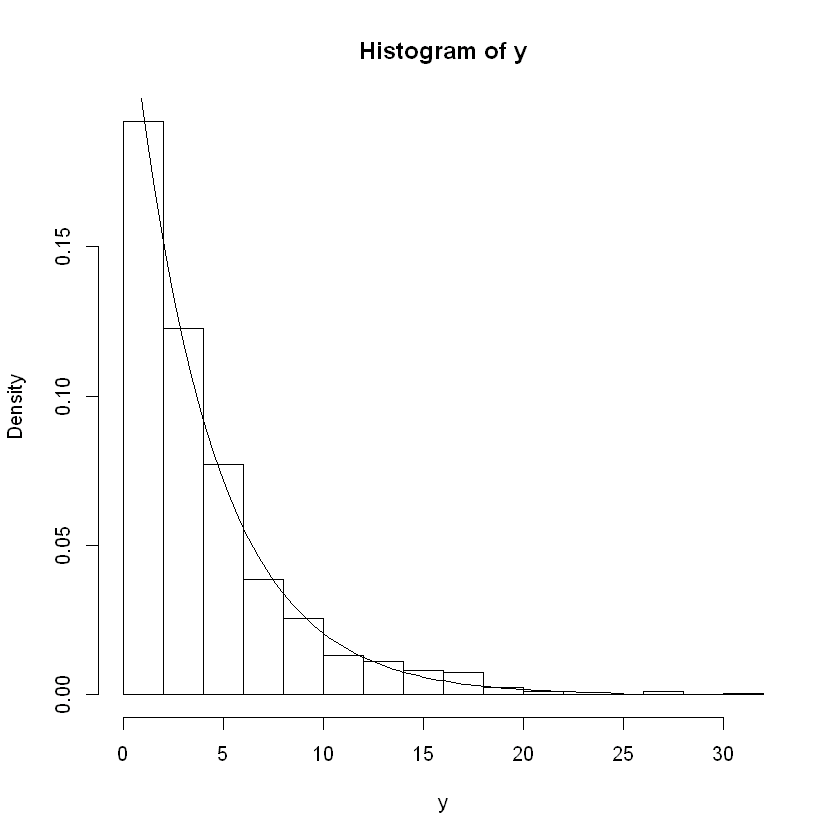

In [15]:
n <- 1000
x <- c(-2,3,7, 10,12)
p <- c(.2,.1,.4,.2,.1)
y <- numeric(n)
for(i in 1:n) y[i]<-gen.vc(x,p)
table(y)/n

y<-sample(x,n,p,replace=TRUE)
table(y)/n

lambda <- 0.25
y <- -log(runif(1000))/lambda
hist(y, freq=FALSE)
curve(dexp(x,lambda),0, 25,add = TRUE)


### 4.3.2 Il metodo del rifiuto

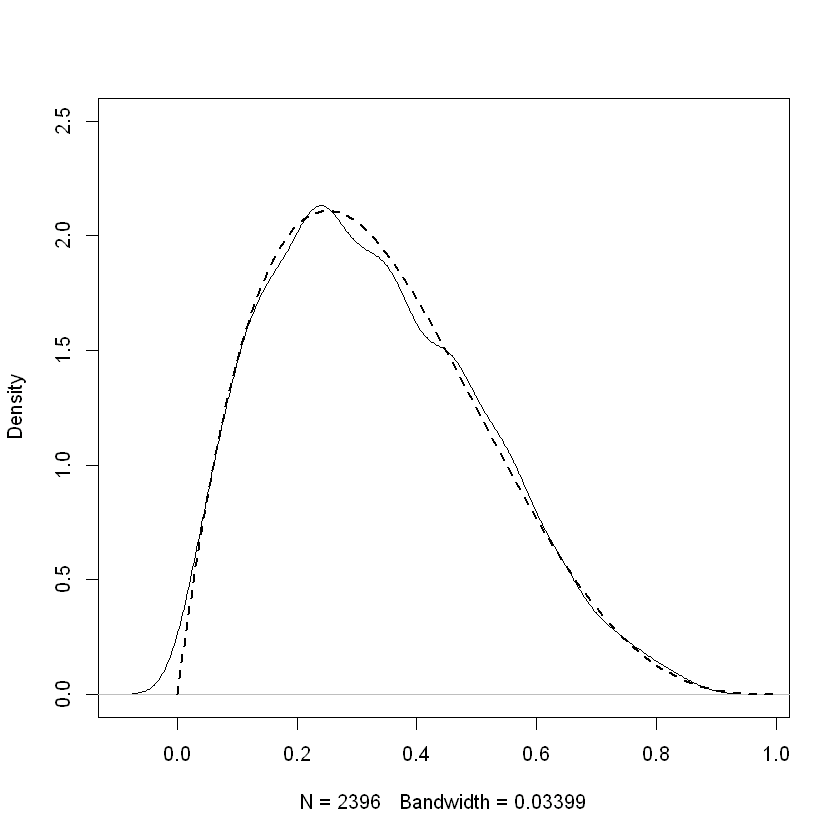

In [18]:
u <- runif(5000)
y <- runif(5000)
w <- 256/27*y*(1-y)^3
z <- which(u <= w)
x <- y[z]
plot(density(x), ylim=c(0,2.5),main="")
curve(20*x*(1-x)^3,0,1,add=TRUE,lty=2,lwd=2)


Esempio con distribuzione normale

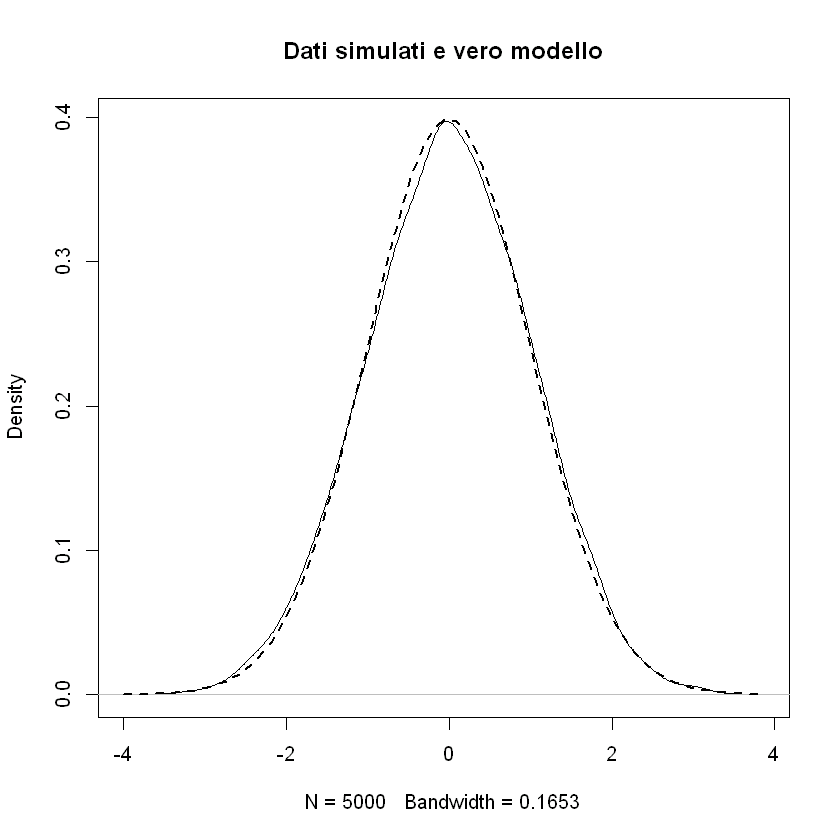

In [22]:
x <- rnorm(5000)
plot(density(x), main="Dati simulati e vero modello")
curve(dnorm(x), add=TRUE, lty=2,lwd=2)

## 4.4 Processi stocastici

### 4.4.1 Passeggiate aleatorie

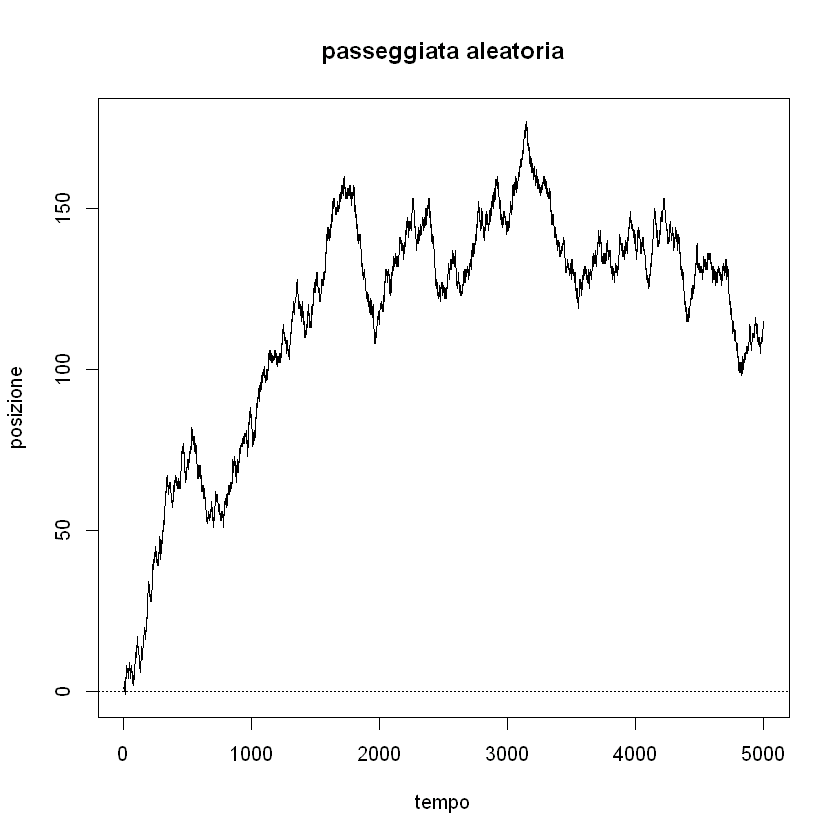

In [23]:
n <- 5000
x <- rbinom(n,1,0.5)
x[which(x==0)]=-1
y <- cumsum(x)
plot(1:n, y, type="l", main="passeggiata aleatoria", xlab="tempo", ylab="posizione")
abline(h=0, lty=3)

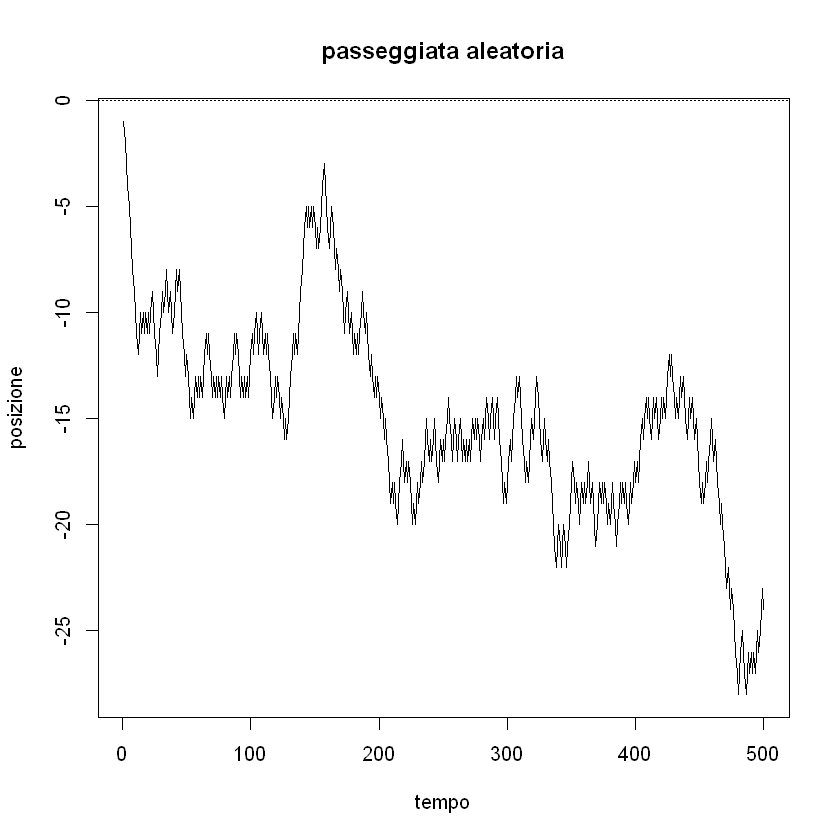

In [24]:
n <- 500
x <- rbinom(n,1,0.45)
x[which(x==0)]=-1
y <- cumsum(x)
plot(1:n, y, type="l", main="passeggiata aleatoria", xlab="tempo", ylab="posizione")
abline(h=0, lty=3)

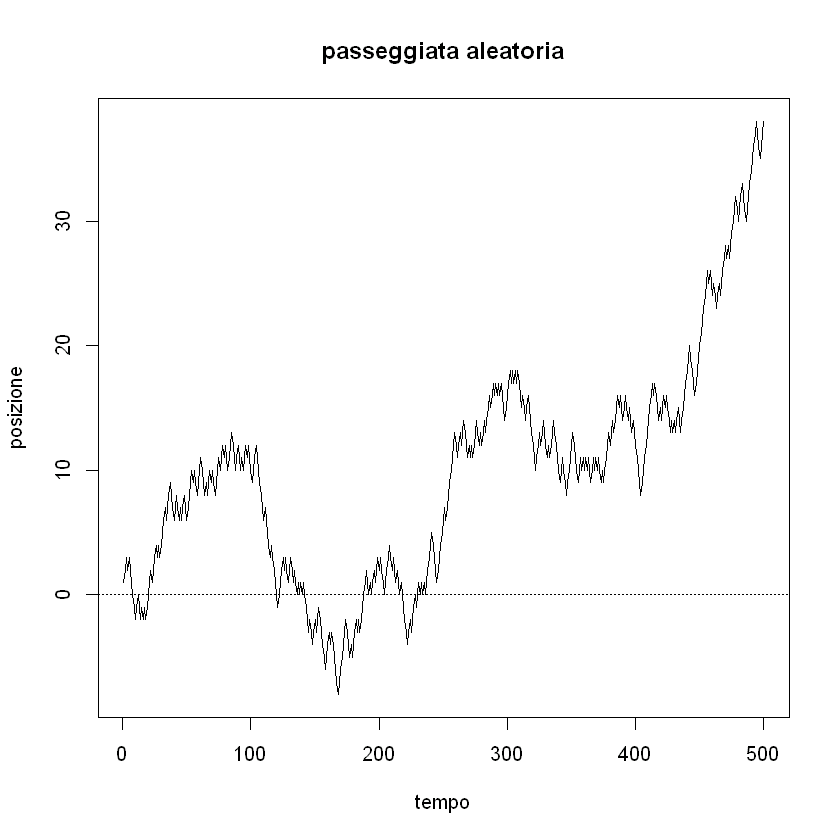

In [25]:
n <- 500
x <- rbinom(n,1,0.55)
x[which(x==0)]=-1
y <- cumsum(x)
plot(1:n, y, type="l", main="passeggiata aleatoria", xlab="tempo", ylab="posizione")
abline(h=0, lty=3)


Esempi con barriere riflettenti

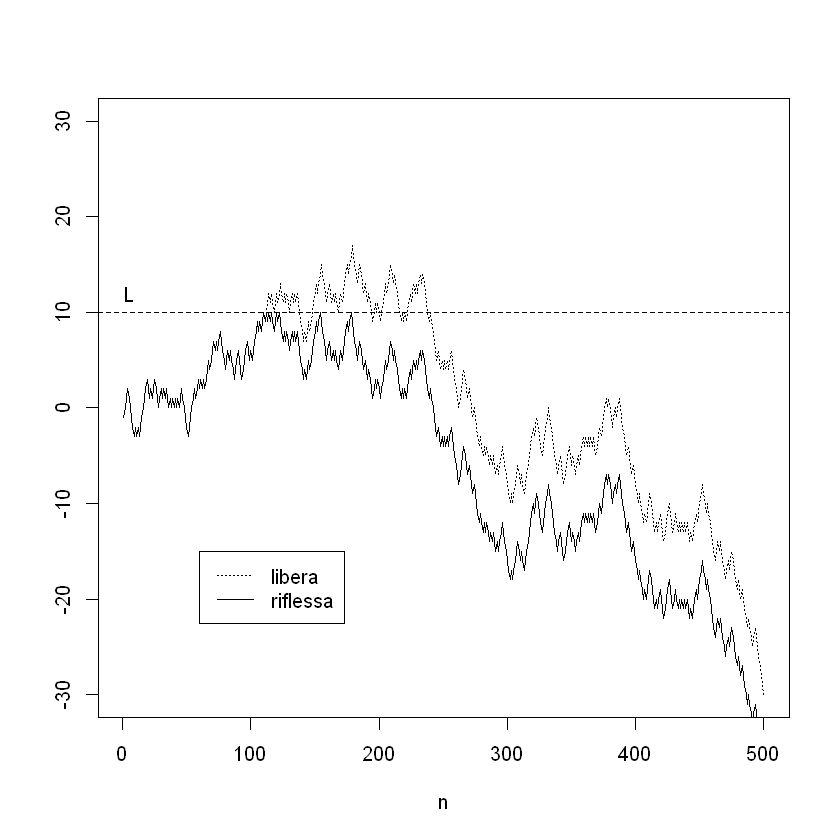

In [27]:
n        <- 500
L        <- 10
continua <- TRUE
x  <- 2*rbinom(n, 1, 0.5) - 1
x1 <- x

while(continua){
  y <- cumsum(x)
  bar <- which(y == L+1)
  if(length(bar)==0)
    continua = FALSE
  else{
    h <- min(bar)
    x[h] <- -1
  }
}
plot(1:n, cumsum(x1),type="l",lty=3, ylab="",xlab="n",ylim=c(-30,30))
lines(1:n,y)
abline(h=L,lty=2)
text(5,L+2,"L")
legend(60,-15,c("libera","riflessa"),lty=c(3,1))


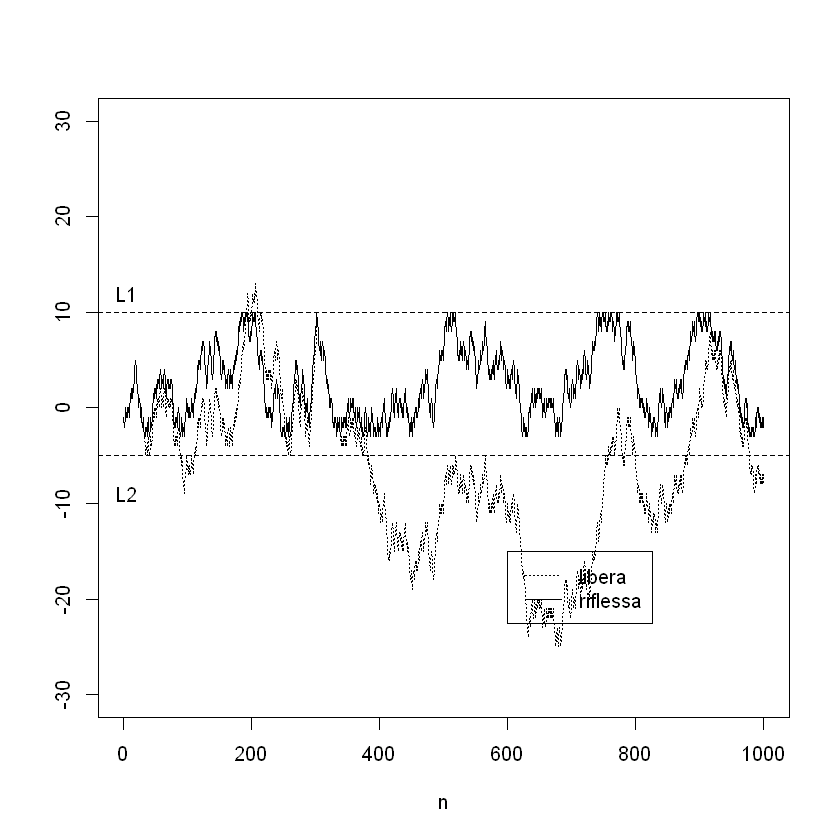

In [30]:
options(warn=-1)
n        <- 1000
L1       <- 10
L2       <- -5
continua <- TRUE
x  <- 2*rbinom(n, 1, 0.5) - 1
x1 <- x

while(continua){
  y <- cumsum(x)
  bar1 <- which(y == L1+1)
  bar2 <- which(y == L2+1)
  if( (length(bar1)==0) & (length(bar2)==0))
    continua = FALSE
  else{
    h1 <- min(bar1)
    h2 <- min(bar2)
    if(min(h1,h2)==h1)
      x[h1] <- -1
    else
      x[h2] <- +1
  }
}

plot(1:n, cumsum(x1),type="l",lty=3, ylab="",xlab="n",ylim=c(-30,30))
lines(1:n,y)
abline(h=L1,lty=2)
abline(h=L2,lty=2)
text(5,L1+2,"L1")
text(5,L2-4,"L2")
legend(600,-15,c("libera","riflessa"),lty=c(3,1))
